## Project Title: Iris Classification using PyTorch Neural Network

### 1. Data Collection 🗂
- Load dataset
- Initial data exploration
- Check for missing values

### 2. Data Preparation 🔄
- Feature scaling/normalization
- Label encoding
- Data visualization

### 3. Data Splitting 📊
- Train-test split
- Validation set creation if needed

### 4. Model Training ⚙️
- Define model architecture
- Set hyperparameters
- Training loop
- Loss tracking

### 5. Model Evaluation 📈
- Accuracy metrics

- Performance visualization

### 6. Predictions 🎯
- Test predictions
- Results analysis

### 7. Model Persistence 💾
- Save trained model
- Save scaler/encoder if used

### 8. Model Loading & Usage 🔄
- Load saved model
- Make new predictions

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. DATA COLLECTION - LOAD AND EXPLORE DATA

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# 2. DATA PREPARATION - LABEL ENCODING & DATA VISUALIZATION

# Change the target column values from strings to numbers
df['variety'] = df['variety'].replace('Setosa', 0)
df['variety'] = df['variety'].replace('Versicolor', 1)
df['variety'] = df['variety'].replace('Virginica', 2)

df.head()

In [4]:
# Set X, y (convention) 
# X: always features, y: always outcome

X = df.drop('variety', axis=1)
y = df['variety']

# Convert these dataframes into numpy arrays
X = X.values
y = y.values


In [5]:
# 3. DATA SPLITTING - TRAIN, TEST & SPLIT! 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [6]:
# 4. MODEL TRAINING

from models.IrisClassifierNN import IrisClassifierNN

# Pick a Manual seed for randomization, like start from this neuron. 
# The seed and random_state could have potential impact on predictions
torch.manual_seed(32)

# Create an instance of the model
model = IrisClassifierNN()

In [7]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Optimizer = Adam Optimizer
# LearningRate (lr): After a bunch of iterations (epochs), if error rate doesn't go down, we probably lower our lr
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.parameters

<bound method Module.parameters of IrisClassifierNN(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [8]:
# Epochs: One run through all the training data in our network
epochs = 100

# Keep track of the losses/errors, it has to decrease overtime that's how we know that the model/network is learning
losses = []

for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train) # Send training data through the entire network and get predicted result

    # Measure the loss, it will be high initially
    loss = criterion(y_pred, y_train) # Predicted values vs the y_train

    # Keep track of the losses. Convert the loss which is tensor to numpy
    losses.append(loss.detach().numpy())

    # Print loss for every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i}, Loss: {loss}')

    # Do some back propagation: Take the error rate of forward propagation and feed it back
    # through the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0, Loss: 1.1699321269989014
Epoch: 10, Loss: 0.9570867419242859
Epoch: 20, Loss: 0.7980871796607971
Epoch: 30, Loss: 0.6327950358390808
Epoch: 40, Loss: 0.43861737847328186
Epoch: 50, Loss: 0.290453165769577
Epoch: 60, Loss: 0.17780695855617523
Epoch: 70, Loss: 0.11584120243787766
Epoch: 80, Loss: 0.0893637165427208
Epoch: 90, Loss: 0.07752915471792221


Text(0, 0.5, 'loss/error')

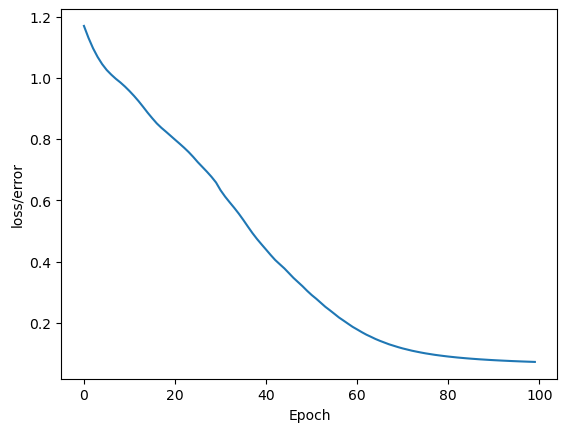

In [9]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('loss/error')


In [10]:
# 5. MODEL EVALUATION - EVALUATE / VALIDATE MODEL ON TEST DATA SET

with torch.no_grad(): # Turn off back propagation
    y_eval = model.forward(X_test) # X_test are features from test data set, y_eval is prediction

    # Find the loss/error 
    loss = criterion(y_eval, y_test)

loss

tensor(0.0538)

In [11]:
# If the loss in the TEST dataset (e.g. 0.1315) is not anywhere near to TRAIN dataset (e.g. 0.06522615998983383), 
# We can also debug and check the network predictions

correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_eval = model.forward(data)

        print(f'{(i+1)}.] {str(y_eval)} \t {y_test[i]} \t {y_eval.argmax().item()}')

        if y_eval.argmax().item() == y_test[i]:
            correct += 1

print(f'\nModel predicted {correct} correct out of {len(y_test)}!')

# From the output, the index that has the highest value in each tensor is the actual prediction
# E.g. tensor([-3.3646,  3.9392,  0.3720]) - index 1 is highest so 1 maps to 'Versicolor' as per conversion we did in PREPARE DATA section


1.] tensor([-3.3646,  3.9392,  0.3720]) 	 1 	 1
2.] tensor([  7.5572,   1.1015, -11.3347]) 	 0 	 0
3.] tensor([  6.5957,   1.5027, -10.4091]) 	 0 	 0
4.] tensor([-3.3331,  4.2594,  0.0623]) 	 1 	 1
5.] tensor([-7.3782,  2.8087,  5.1605]) 	 2 	 2
6.] tensor([-7.3760,  3.9013,  4.2826]) 	 2 	 2
7.] tensor([  6.1971,   1.6470, -10.0047]) 	 0 	 0
8.] tensor([  6.6383,   1.4348, -10.4031]) 	 0 	 0
9.] tensor([-2.6753,  4.3091, -0.6392]) 	 1 	 1
10.] tensor([  7.1875,   1.3812, -11.0965]) 	 0 	 0
11.] tensor([-3.8318,  4.4027,  0.5246]) 	 1 	 1
12.] tensor([-8.6807,  1.9994,  6.8923]) 	 2 	 2
13.] tensor([-2.0678,  3.8200, -0.7571]) 	 1 	 1
14.] tensor([-1.0768,  4.3741, -2.2838]) 	 1 	 1
15.] tensor([-7.4965,  2.6207,  5.3287]) 	 2 	 2
16.] tensor([-8.6136,  1.5508,  7.1186]) 	 2 	 2
17.] tensor([-3.7761,  3.6462,  0.9487]) 	 1 	 1
18.] tensor([-6.7608,  2.7754,  4.5281]) 	 2 	 2
19.] tensor([-1.7048,  4.1980, -1.4670]) 	 1 	 1
20.] tensor([  7.7757,   1.3740, -11.8864]) 	 0 	 0
21.] tensor

In [12]:
# 6. PREDICTIONS

# Let's check how the model predicts with unseen NEW data

# DIFF between model.forward(data) vs model(data)

# When you call the model instance directly, the internal _call_ function is used. This function manages 
# all registered hooks and calls forward afterward. That’s also the reason you should call the model instance directly 
# when evaluating new data, because otherwise your hooks might not be called. 
# In that case nothing needs to be called before the forward method, but it's a good habit to adopt anyway.

new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

with torch.no_grad():
    pred = model(new_iris)

    print(f'NEW data prediction: {pred} \t {pred.argmax().item()}')

# Since index 0 has highest value, 0 maps to 'Setosa' is the predicted flower

NEW data prediction: tensor([  6.8839,   1.2461, -10.5586]) 	 0


In [13]:
new_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

with torch.no_grad():
    pred = model(new_iris)

    print(f'NEW data prediction: {pred} \t {pred.argmax().item()}')


NEW data prediction: tensor([-6.7321,  2.6617,  4.5484]) 	 2


In [14]:
# 7. MODEL PERSISTENCE

# Save this NN Model (Saves current state - all weights and biases)
torch.save(model.state_dict(), 'iris-classification-nn.pt')

In [ ]:
# 8. MODEL LOADING & USAGE

# Load the saved Model
new_model = IrisClassifierNN()

new_model.load_state_dict(torch.load('iris-classification-nn.pt'))

In [16]:
# Make sure the model loaded correctly

new_model.eval()

IrisClassifierNN(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [17]:
new_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

with torch.no_grad():
    pred = new_model(new_iris)

    print(f'NEW data prediction: {pred} \t {pred.argmax().item()}')

NEW data prediction: tensor([-6.7321,  2.6617,  4.5484]) 	 2
